# Extract and Clean Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
df = pd.read_csv("../diamonds.csv")   
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
df = df[(df['x'] != 0) & (df['y'] != 0) & (df['z'] != 0)]
df.shape

(53920, 10)

In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
df.shape

(53920, 10)

In [6]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

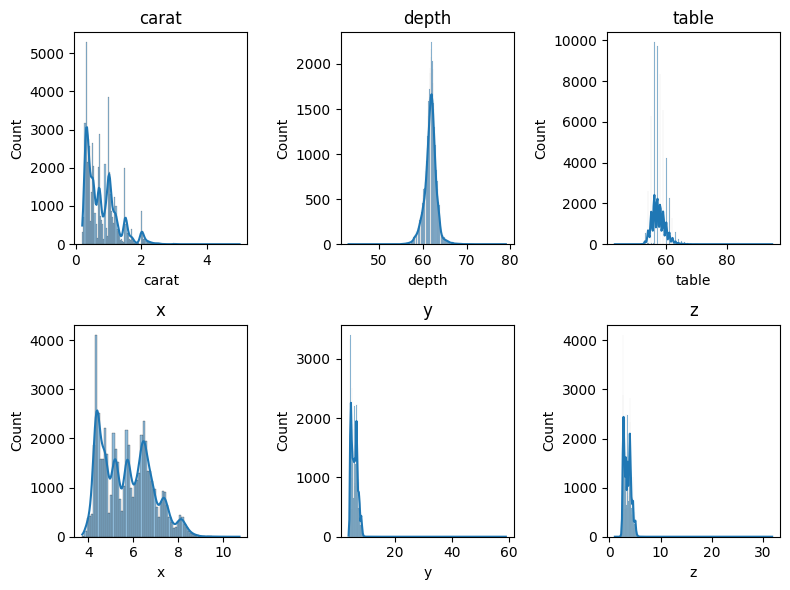


mean:
carat     0.797698
depth    61.749514
table    57.456834
x         5.731627
y         5.734887
z         3.540046
dtype: float64 , 
median:
carat     0.70
depth    61.80
table    57.00
x         5.70
y         5.71
z         3.53
dtype: float64 , 
std:
 carat    0.473795
depth    1.432331
table    2.234064
x        1.119423
y        1.140126
z        0.702530
dtype: float64


In [7]:
### Plot distribution of each continous feature
features_to_plot = ['carat', 'depth', 'table', 'x','y','z']
plt.figure(figsize=(8, 6))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()
print("\nmean:\n{} , \nmedian:\n{} , \nstd:\n {}".format(df[features_to_plot].mean() , 
                                                         df[features_to_plot].median(), 
                                                         df[features_to_plot].std()))

# Categorical Features

In [8]:
categorical_df = df.select_dtypes(include=['object'])
categorical_columns = categorical_df.columns
categorical_df

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


# Numerical Features

In [9]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
numerical_columns = numerical_df.columns
numerical_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


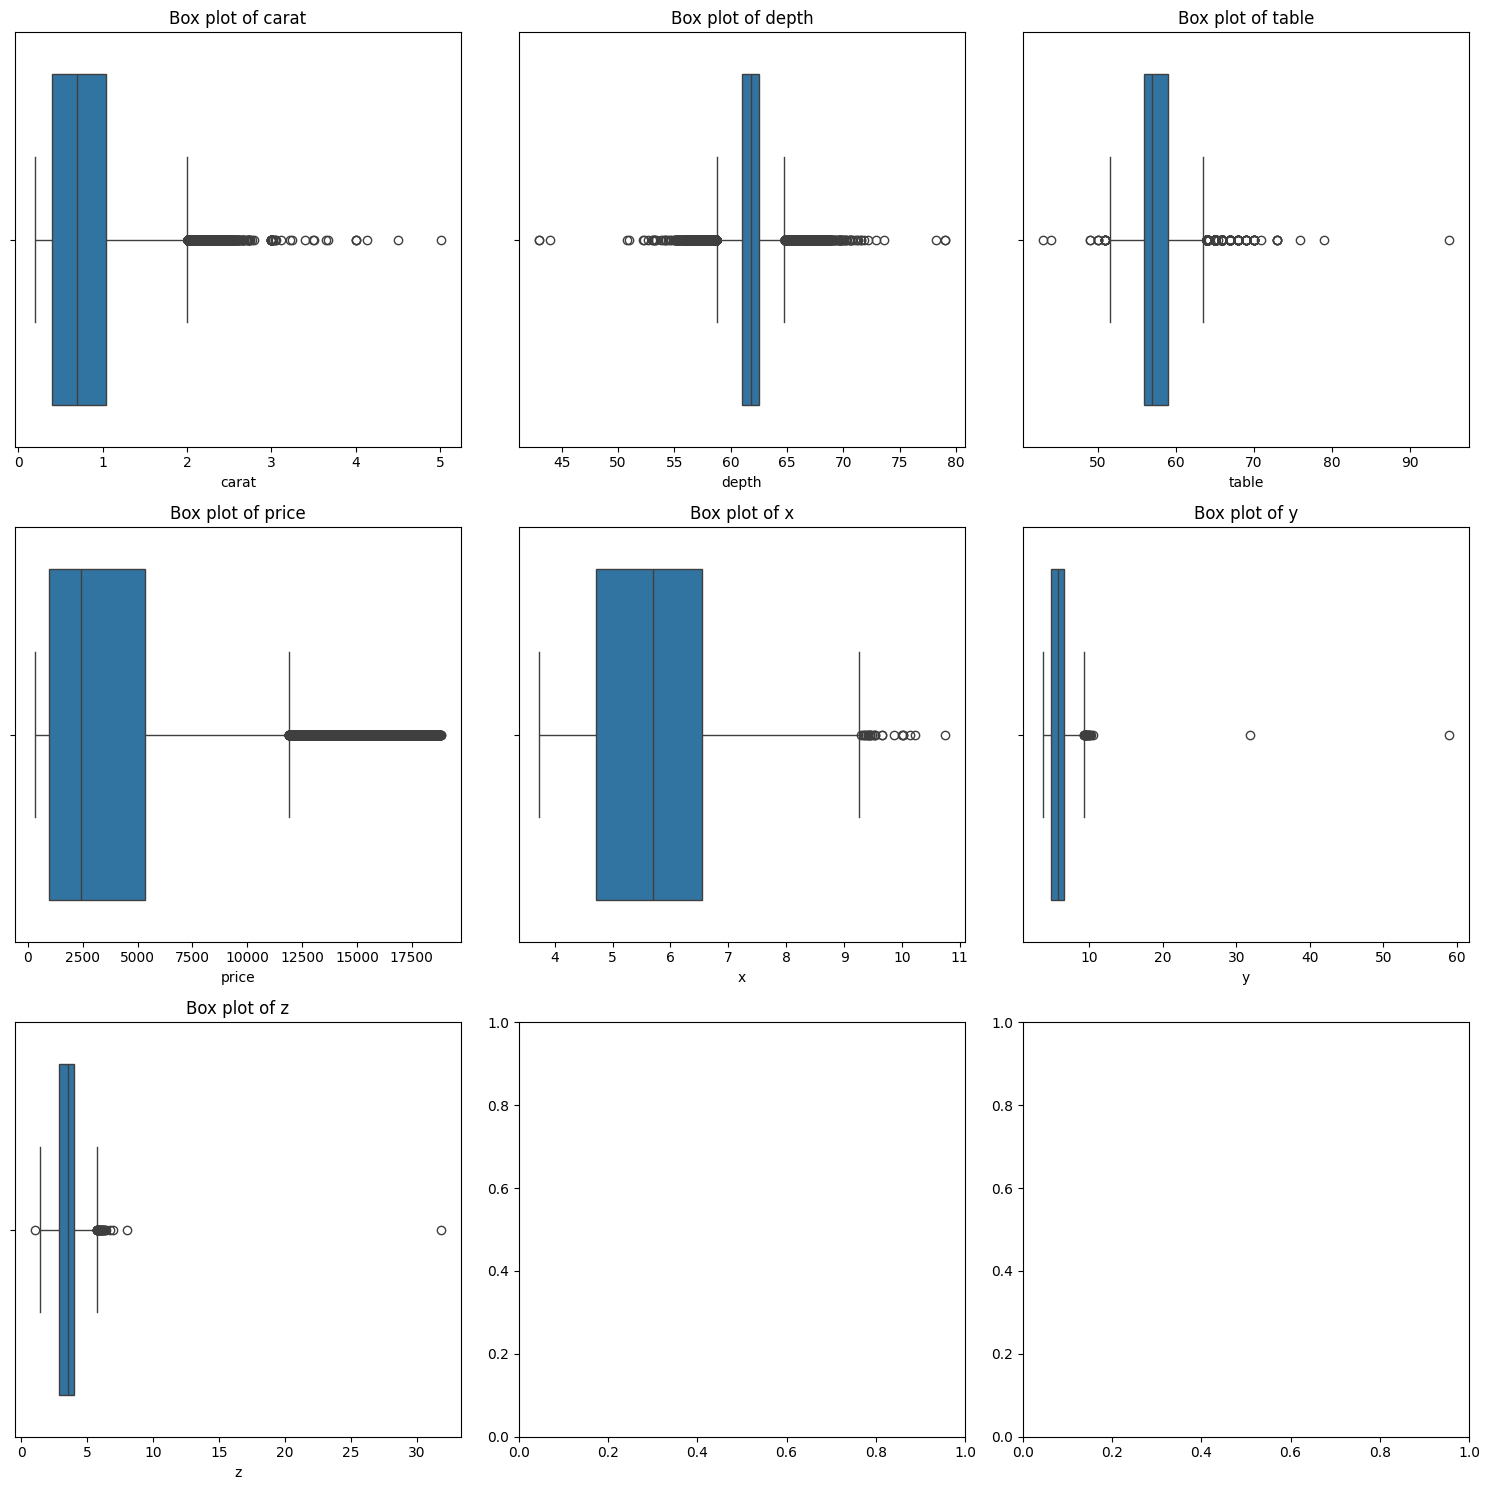

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


n = len(numerical_columns)
n_cols = 3
n_rows = int(np.ceil(n / n_cols))

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*5))

for i, feature in enumerate(numerical_columns):
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(x=df[feature], ax=axs[row, col])
    axs[row, col].set_title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()

In [11]:
for feature in numerical_columns:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # only keep rows in the dataframe that have values within 1.5*IQR of Q1 and Q3
    df = df[~((df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR)))]

df.shape

(46530, 10)

# Encode Categorical Features

In [12]:
for column in categorical_columns:
    categories = df[column].unique()
    print(f"Categories for column '{column}': {categories.tolist()}")

Categories for column 'cut': ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories for column 'color': ['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories for column 'clarity': ['SI2', 'SI1', 'VS2', 'VVS2', 'VVS1', 'VS1', 'I1', 'IF']


In [13]:
le = LabelEncoder()

for feature in categorical_columns:
    df[feature] = le.fit_transform(df[feature])
    
df.shape

(46530, 10)

# Train Test Split and Scale Data

In [14]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
average_residuals = np.mean(np.abs(y_test - y_pred))
print(f"Average residuals: {average_residuals}")

Average residuals: 574.0216896339329


# Lasso Regression

In [16]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
average_residuals = np.mean(np.abs(y_test - y_pred))
print(f"Average residuals: {average_residuals}")

Average residuals: 579.9444188779545


# Ridge Regression

In [17]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
average_residuals = np.mean(np.abs(y_test - y_pred))
print(f"Average residuals: {average_residuals}")

Average residuals: 574.8066317901436


# Multi Layer Perceptron using PyTorch

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [19]:
!nvidia-smi
torch.cuda.is_available()

Fri May 17 14:49:42 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.23                 Driver Version: 536.23       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4070 Ti   WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   51C    P0              44W / 285W |   4293MiB / 12282MiB |      7%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

True

In [20]:
# convert the data to PyTorch tensors
device = "cuda" if torch.cuda.is_available() else "cpu"
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32, device=device)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32, device=device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32, device=device)

In [21]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(9, 64) # Input layer
        self.fc2 = nn.Linear(64, 32) # Hidden layer
        self.fc3 = nn.Linear(32, 16) # Hidden layer
        self.fc4 = nn.Linear(16, 1) # Output layer

    def forward(self, x):
        x = F.relu(self.fc1(x)) # Activation function for input layer
        x = F.relu(self.fc2(x)) # Activation function for hidden layer
        x = F.relu(self.fc3(x)) # Activation function for hidden layer
        x = self.fc4(x) # No activation function for output layer
        return x

d:\Programming\Programming languages\Python\Lib\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([512])) that is different to the input size (torch.Size([512, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
d:\Programming\Programming languages\Python\Lib\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([9306])) that is different to the input size (torch.Size([9306, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
d:\Programming\Programming languages\Python\Lib\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([360])) that is different to the input size (torch.Size([360, 1])). This will likely lead to incorrect results due to broadca

Epoch 10/100, Average MAE Loss: 2999.9675995291095
Epoch 10/100, Average Test Loss: 2998.19140625


KeyboardInterrupt: 

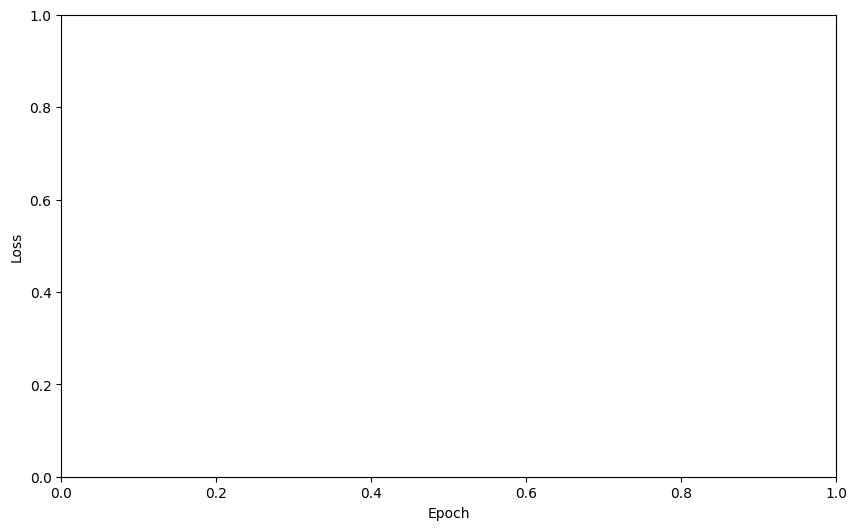

In [22]:
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Create a DataLoader instance
dataset = TensorDataset(X_train_tensor, y_train_tensor)
dataloader = DataLoader(dataset, batch_size=512, shuffle=True)

# Create an instance of your model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP().to(device)

def MAELoss(output, target):
    return torch.mean(torch.abs(output - target))

# Define a loss function and an optimizer
criterion = nn.L1Loss()  # Mean Absolute Error Loss
optimizer = optim.SGD(model.parameters(), lr=1e-7)  # Stochastic Gradient Descent

# Number of epochs (iterations over the entire dataset)
epochs = 100
plt.figure(figsize=(10, 6))
plt.xlabel('Epoch')
plt.ylabel('Loss')

train_losses = []
test_losses = []
    
for epoch in range(epochs):
    batch_train_losses = []
    batch_test_losses = []
    model.train()
    
    for inputs, price in dataloader:
        inputs, price = inputs.to(device), price.to(device)
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, price)
        test_loss = criterion(model(X_test_tensor), y_test_tensor)
        batch_test_losses.append(test_loss.item())
        batch_train_losses.append(loss.item())
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
    
    # Compute the average loss over the entire training data
    model.eval()
    epoch_loss = np.mean(batch_train_losses)
    train_losses.append(epoch_loss)
    test_loss = np.mean(batch_test_losses)
    test_losses.append(test_loss)

    if(epoch % 10 == 0 and epoch != 0):
        print(f'Epoch {epoch}/{epochs}, Average MAE Loss: {epoch_loss}')
        print(f'Epoch {epoch}/{epochs}, Average Test Loss: {test_loss}')
    
    # Check if loss is NaN
    if torch.isnan(loss):
        print("Loss is NaN. Adjusting learning rate or batch size may help.")
        break
    
# Move test data to the device
X_test_tensor, y_test_tensor = X_test_tensor.to(device), y_test_tensor.to(device)

# Set the model to evaluation mode


# Make predictions on the test data
with torch.no_grad():
    predictions = model(X_test_tensor)

# Compute the loss on the test data
test_loss = criterion(predictions, y_test_tensor)

plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()

print(f'Test Loss: {test_loss.item()}')

torch.save(model.state_dict(), 'baseline.pth')

# XGBoost Regressor

In [23]:
from xgboost import XGBRegressor

# Assuming X is your feature matrix and y are your labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBRegressor
model = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 500)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate MAE
mae = np.mean(np.abs(y_test - y_pred))
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 230.23115977712172


### NN with ReLU activation function

In [24]:
import torch
from torch import nn

class DiamondPredictor_v1(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(X_train_tensor.shape[1], 20),
            nn.ReLU(),
            nn.Linear(20, 20),
            nn.ReLU(),
            nn.Linear(20, 20),
            nn.ReLU(),
            nn.Linear(20, 20),
            nn.ReLU(),
            nn.Linear(20, 1),
        )
    
    def forward(self, x):
        return self.layers(x)

In [25]:
model = DiamondPredictor_v1(X_train_tensor.shape[1]).to(device)
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [27]:
num_epochs = 100
batch_size = 512
train_loss_list = []
epoch_list = []
test_loss_list = []

for epoch in range(num_epochs):
    epoch_list.append(epoch)
    total_train_loss = 0
    total_batches = 0

    model.train()
    for i in range(0, X_train_tensor.shape[0], batch_size):
        optimizer.zero_grad()
        end = i + batch_size
        X_batch = X_train_tensor[i:end].to(device)
        y_batch = y_train_tensor[i:end].to(device)

        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        total_batches += 1

    average_train_loss = total_train_loss / total_batches
    train_loss_list.append(average_train_loss)

    model.eval()
    total_test_loss = 0
    total_batches = 0
    with torch.no_grad():
        for i in range(0, X_test_tensor.shape[0], batch_size):
            end = i + batch_size
            X_batch = X_test_tensor[i:end].to(device)
            y_batch = y_test_tensor[i:end].to(device)

            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)

            total_test_loss += loss.item()
            total_batches += 1

    average_test_loss = total_test_loss / total_batches
    test_loss_list.append(average_test_loss)

    print(f'Epoch {epoch}, Train Loss: {average_train_loss:.4f}, Test Loss: {average_test_loss:.4f}')

d:\Programming\Programming languages\Python\Lib\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([512])) that is different to the input size (torch.Size([512, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
d:\Programming\Programming languages\Python\Lib\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([360])) that is different to the input size (torch.Size([360, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch 0, Train Loss: 2007.4674, Test Loss: 2011.3559
Epoch 1, Train Loss: 2007.2040, Test Loss: 2011.1961
Epoch 2, Train Loss: 2007.1367, Test Loss: 2011.0709
Epoch 3, Train Loss: 2007.0691, Test Loss: 2010.9706
Epoch 4, Train Loss: 2007.0104, Test Loss: 2010.8933
Epoch 5, Train Loss: 2006.9568, Test Loss: 2010.8436
Epoch 6, Train Loss: 2006.9038, Test Loss: 2010.8226
Epoch 7, Train Loss: 2006.8438, Test Loss: 2010.8306
Epoch 8, Train Loss: 2006.7861, Test Loss: 2010.8646
Epoch 9, Train Loss: 2006.7317, Test Loss: 2010.9240
Epoch 10, Train Loss: 2006.6852, Test Loss: 2010.9988
Epoch 11, Train Loss: 2006.6462, Test Loss: 2011.0895
Epoch 12, Train Loss: 2006.6130, Test Loss: 2011.1844
Epoch 13, Train Loss: 2006.5814, Test Loss: 2011.2761
Epoch 14, Train Loss: 2006.5563, Test Loss: 2011.3647
Epoch 15, Train Loss: 2006.5393, Test Loss: 2011.4388
Epoch 16, Train Loss: 2006.5277, Test Loss: 2011.5089
Epoch 17, Train Loss: 2006.5159, Test Loss: 2011.5727
Epoch 18, Train Loss: 2006.5063, Test 

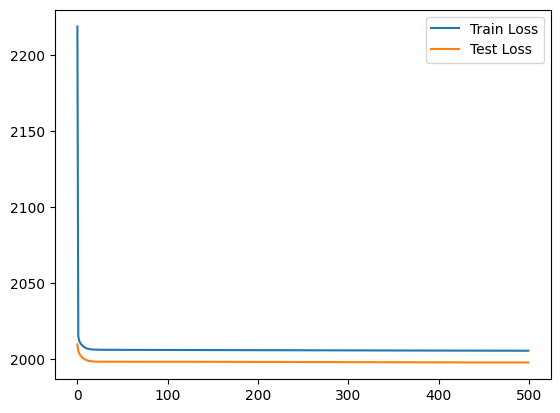

In [ ]:
plt.plot(epoch_list, train_loss_list, label='Train Loss')
plt.plot(epoch_list, test_loss_list, label='Test Loss')
plt.legend()

In [31]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.optimizers import Adam
from keras.layers import Dropout
from tensorflow.keras.models import Sequential
from keras.datasets import mnist
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from keras.layers import Activation
from sklearn import preprocessing
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,explained_variance_score,mean_absolute_error,explained_variance_score,r2_score,mean_squared_error

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [79]:
model = Sequential()
model.add(Dense(10,input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))

model.add(Dense(1))
model.summary()

d:\Programming\Programming languages\Python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 10)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,389 (48.39 KB)

 Trainable params: 12,389 (48.39 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
seed = 42
# learning rate
lr=0.01
num_epochs = 2000
# adam optimizasyonu kullanıldı
adam0 = Adam(learning_rate = lr)
batch_size=512
# loss değeri mean_absolute_error olarak belirlendi

In [81]:
model.compile(optimizer=adam0,loss='mean_absolute_error')
history=model.fit(X_train,Y_train, validation_data=(X_test,Y_test),batch_size=batch_size,epochs=num_epochs,validation_split=0.2)
preds = model.predict(X_test)

Epoch 1/1000


64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2351.6946 - val_loss: 1953.5756
Epoch 2/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1933.9387 - val_loss: 1641.0432
Epoch 3/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1166.7080 - val_loss: 564.3400
Epoch 4/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 504.0192 - val_loss: 479.7495
Epoch 5/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 452.2022 - val_loss: 529.4633
Epoch 6/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 460.7570 - val_loss: 431.8130
Epoch 7/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 444.4963 - val_loss: 434.5542
Epoch 8/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 438.9226 - val_loss: 461.8060
Epoch 9/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 429.8099 - val_loss: 449.7381
Epoch 10/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 446.7744 - val_loss: 549.4734
Epoch 11/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 448.1704 - val_loss: 421.1612
Epoch 12/1000
64

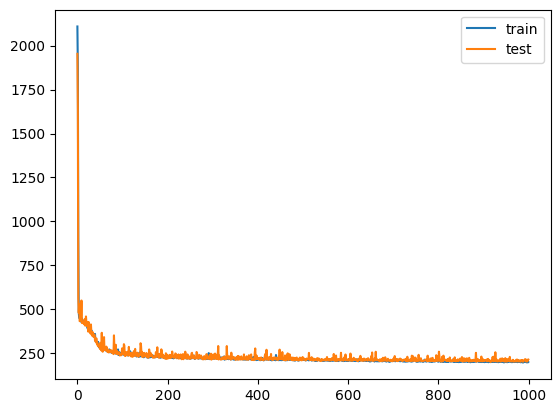

In [83]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()